# Data Argumentation

A common problem, is the amount of data available to enter the models, for models to present the expected results it is necessary for training to occur with a large amount of data (dataset), but in many cases the data needed to perform these tasks is not available.
This is where the **Data Augmentation** technique comes in that, as the name suggests, allows us to augment our dataset in two ways:




*   Introducing disturbances in the original data. For example: taking an original image centered, we replicate it off-center, reversing axes…
*   Using different distributions. Example: if we want to train a model to classify high-resolution images, we add low-resolution images, with noise… always maintaining the highest high-resolution ratio.

At first, neural networks are not intelligent. For example, a poorly trained neural network would think that these three tennis balls shown below are distinct and unique images.

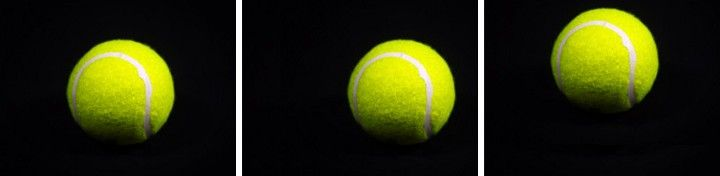


The same ball with some translations.


So if we work with images, it is only necessary to make some small alterations to our dataset and we can achieve our goal.
There are many ways to augment data with images, such as:


1.   Turn around (Flip)
2.   Rotation

1.   Scale
2.   Cutout

1.   Traslation
2.   Gaussian noise

##What is Keras?

Keras is an open source library (with MIT license) written in Python, which is mainly based on the work of François Chollet, a Google developer, in the framework of the ONEIROS (Open-ended Neuro-Electronic Intelligent Robot Operating System) project . The first version of this multiplatform software was released on March 28, 2015. The goal of the library is to speed up the creation of neural networks: for this, Keras does not work as a standalone framework, but as an intuitive user interface (API) that allows access to various machine learning frameworks and develop them. Keras-supported frameworks include Theano, Microsoft Cognitive Toolkit (formerly CNTK), and TensorFlow.

##What advantages does Keras offer?
The Keras open source library is an excellent addition to the tools used to create neural networks, as it greatly simplifies this process. In this case, the focus is mostly on improving usability: Keras works as an interface designed expressly for people and only secondarily for machines. User actions required for critical use cases are kept to a minimum, and if errors still occur, feedback is provided to help resolve them. Therefore, learning to use Keras is relatively easy, which improves productivity. In addition, thanks to the connection with deep learning frameworks, this simplicity does not lead to functional limitations: you can incorporate all the features you want through interfaces that adapt perfectly (or disable them again if necessary).

Keras also has the following advantages:

* Wide cross-platform compatibility for developed models: Models developed with Keras are especially easy to use on different platforms. For example, they are compatible with iOS (Apple CoreML), Android (Keras TensorFlow Android Runtime), Google Cloud and Raspberry Pi by default.

* Multiple backend engine support: Keras not only gives you a lot of freedom when choosing the backend, but it also allows you to combine multiple engines. Furthermore, it is possible to transfer the developed models to another backend at any time.

* Excellent support for multiple GPUs: With Keras, the resources required to develop deep learning processes can be easily distributed across multiple chips or graphics cards.

* Development by large companies: the maintenance and development of Keras is supported by the most important companies in the sector. Google, Amazon AWS, Microsoft, Apple and Nvidia, among others, are involved in the project.

Information obtained from the website: https://www.ionos.es/digitalguide/online-marketing/marketing-para-motores-de-busqueda/que-es-keras/ 


The Keras library provides the ability to use data augmentation automatically when training a model.
This is accomplished by using the ImageDataGenerator class.
A variety of techniques are supported, as well as pixel scaling methods, such as:


*   The changes in the image (translations) through the arguments **width_shift_range** y **height_shift_range**.
*  Turning the image around using the arguments **horizontal_flip** y **vertical_flip**.
*   Image rotations through storyline **rotation_range**
*   Image brightness using the argument **brightness_range**.
*   Image zoom using the argument **zoom_range**.

Let's independently look at examples of images after they have been magnified. It is common to use a variety of augmentation techniques at the same time during training.

In [1]:
import matplotlib.pyplot as plt    #Library that allows graphing, very MATLAB style
import numpy as np                  #Library that allows working with arrangement  
from numpy import expand_dims       #Expand the array shape 
from keras.preprocessing.image import load_img    #From the Keras library for data augmentation, we load the image in the python image library (PIL) format
from keras.preprocessing.image import img_to_array #will take a picture (PIL) and convert it to a matrix. If part of a PNG image, the values within the image will be between 0 and 255.
from keras.preprocessing.image import ImageDataGenerator #will take a picture (PIL) and convert it to a matrix. If part of a PNG image, the values within the image will be between 0 and 255.
from PIL import Image #python image library
from urllib.request import urlopen #Lets read an email address

First we upload an image from the internet

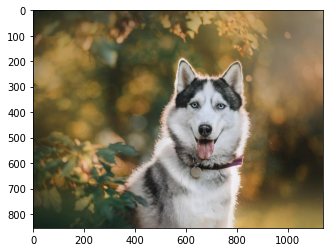

In [2]:
url = 'https://estaticos.muyinteresante.es/media/cache/1140x_thumb/uploads/images/gallery/59bbb29c5bafe878503c9872/husky-siberiano-bosque.jpg'
filename = urlopen(url)
img = Image.open(filename)
plt.imshow(img)

Let's start with a makeover which means moving all the pixels in the image in one direction, such as horizontally or vertically, while keeping the same image dimensions.

The width_shift_range and height_shift_range arguments of the ImageDataGenerator constructor control the amount of horizontal and vertical scrolling respectively.

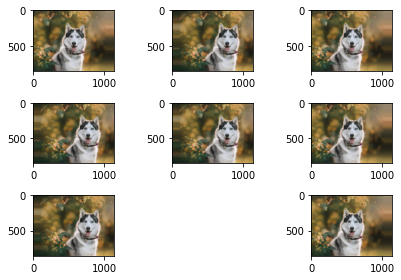

In [3]:
# We convert the image to an arrangement
data = img_to_array(img)
# we expand to a sample
samples = expand_dims(data, 0)
# We create the data augmenter using only image change
datagen = ImageDataGenerator(width_shift_range=[-100,100])
# we prepare the iterator
it = datagen.flow(samples, batch_size=1)
# we generate samples and display the results
for i in range(9):
	plt.subplot(330 + 1 + i)
	# batches of images are generated
	batch = it.next()
	image = batch[0].astype('uint8') # is converted to a valid value so that it can be displayed as an image
	plt.imshow(image)
	plt.tight_layout()
plt.show()

An image flip means to reverse the rows or columns of pixels in the case of a vertical or horizontal flip, respectively.
The magnification is specified by a Boolean argument **horizontal_flip** or **vertical_flip** for the **ImageDataGenerator** class.

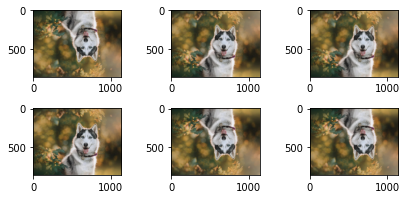

In [4]:
datagen = ImageDataGenerator(vertical_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(6):
	plt.subplot(330.5 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The amount of zoom is sampled uniformly at random from the zoom region for each dimension (width, height) separately.

Floating or [lower limit, upper limit]. Range for random zoom. If it is a float, [lower limit, upper limit] = [1-zoom_range, 1 + zoom_range]

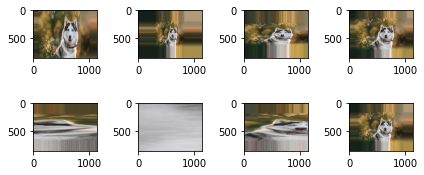

In [6]:
datagen = ImageDataGenerator(zoom_range=1.5) #float o Rango [lower,upper]
it = datagen.flow(samples, batch_size=1)
for i in range(8):
	plt.subplot(340+ 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The image is randomly rotated clockwise a specified number of degrees from 0 to 360. It will likely rotate pixels outside of the image frame, leaving areas of the frame with no pixel data, which need to be filled.

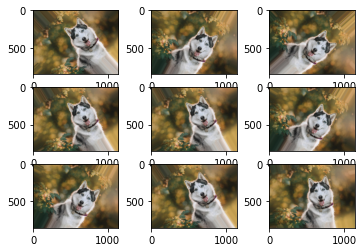

In [7]:
datagen = ImageDataGenerator(rotation_range=50)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

The combination of these techniques allows us to increase the amount of data in the dataset to be used, in many jobs a data augmentation is used to increase the amount of training images and improve the precision of the job.

          featurewise_center: Boolean, set the mean of each element to zero of all data.
          samplewise_center**: Boolean, to set the mean of each sample to zero.
          featurewise_std_normalization: Boolean, Divide the entries by the standard deviation (std.) Of the data set, based on the characteristics.
          samplewise_std_normalization: Boleano, divide each data by its std.
          zca_epsilon:  The default is 1e-6.
          zca_whitening: Boolean, indicates if ZCA bleaching is applied.

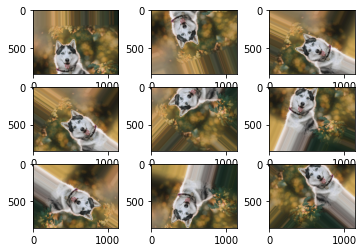

In [9]:
datagen = ImageDataGenerator(
            rotation_range               = 80,
            width_shift_range            = [10,10],   
            height_shift_range           = [200,200],   
            horizontal_flip              = True,   
            vertical_flip                = True)  
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330+ 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

Now we consider words, the necessary work is not so simple given the inherent complexity of the language (we cannot replace each word by its synonym and even if we do, we run the risk that the meaning of the sentence changes completely.
There are some libraries that can help us to carry out this task, we will start by analyzing the following:


1. Text Attack
2. Google Trans

# TextAttack
It is a Python framework for adversary attacks, adversary training, and data augmentation in NLP. We will focus only on data augmentation.

In [10]:
!pip install textattack

     |████████████████████████████████| 327kB 2.8MB/s 
     |████████████████████████████████| 317kB 8.3MB/s 
     |████████████████████████████████| 3.0MB 12.2MB/s 
     |████████████████████████████████| 245kB 29.2MB/s 
     |████████████████████████████████| 1.7MB 31.4MB/s 
     |████████████████████████████████| 102kB 7.4MB/s 
     |████████████████████████████████| 1.1MB 33.4MB/s 
     |████████████████████████████████| 778kB 36.4MB/s 
     |████████████████████████████████| 235kB 46.2MB/s 
     |████████████████████████████████| 61kB 6.9MB/s 
     |████████████████████████████████| 153kB 41.9MB/s 
     |████████████████████████████████| 686kB 43.5MB/s 
     |████████████████████████████████| 61kB 6.4MB/s 
     |████████████████████████████████| 983kB 44.2MB/s 
     |████████████████████████████████| 798kB 41.0MB/s 
     |████████████████████████████████| 19.7MB 2.9MB/s 
     |████████████████████████████████| 1.1MB 40.0MB/s 
     |████████████████████████████████| 71kB 6.7MB/s 
 

In [11]:
from textattack.augmentation import WordNetAugmenter, EmbeddingAugmenter, EasyDataAugmenter, CharSwapAugmenter

textattack: Updating TextAttack package dependencies.
textattack: Downloading NLTK required packages.


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


2020-10-17 00:43:00 INFO: Downloading default packages for language: en (English)...
2020-10-17 00:47:37 INFO: Finished downloading models and saved to /root/stanza_resources.
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [12]:
text = "If I find my way would you walk it with me."

TextAttack provides us with four methods for data augmentation.

## WordNetAugmenter
Augments the text by replacing it with synonyms from the WordNet thesaurus (thesaurus).

WordNet is a lexical database for English. Nouns, verbs, adjectives, and adverbs are grouped into sets of cognitive synonyms (synsets), each of which expresses a different concept.
WordNet superficially resembles a thesaurus in that it groups words based on their meaning.

In [13]:
aug = WordNetAugmenter();
aug.augment(text)

['If I find my way would you walking it with me.']

## EmbeddingAugmenter
Augment text by transforming words with their inlays, with a constraint to ensure that their cosine similarity is at least 0.8.



In [14]:
aug = EmbeddingAugmenter();
aug.augment(text)

textattack: Downloading https://textattack.s3.amazonaws.com/word_embeddings/paragramcf.
100%|██████████| 481M/481M [00:07<00:00, 66.2MB/s]
textattack: Unzipping file /root/.cache/textattack/tmp7c_fagdl.zip to /root/.cache/textattack/word_embeddings/paragramcf.
textattack: Successfully saved word_embeddings/paragramcf to cache.


['Though I find my way would you walk it with me.']

## CharSwapAugmenter
Augment text by substituting, deleting, inserting, and swapping adjacent characters.

In [15]:
aug = CharSwapAugmenter()
aug.augment(text)

['fI I find my way would you walk it with me.']

## EasyDataAugmenter
This augments the text with a combination of Wordnet synonym replacement, word deletion, word order changes, and synonym insertions. All these 4 functionalities occur randomly. So we will get different results every time we run the code. This returns 4 augmented results, unlike the other methods.


In [16]:
aug = EasyDataAugmenter()
aug.augment(text)

['If I detect my way would you walk it with me.',
 'If I find way would you walk it with me.',
 'If me find my way would you walk it with I.',
 'If I find my way would you IT walk it with me.']

Googletrans uses the Google Translate Ajax API for language detection and translation.

The key parameters for the **translate ()** method are:



1. **src**: source language. this parameter is optional as **googletrans** will detect it.
2. **dest**: target language. Mandatory parameter.

1. **text**: the text to be translated from the source language to the target language. Mandatory parameter.

When using this method what happens is a retranslation, we go from the original language to a target language and then we return to the original, during this backtranslation, there is a slight change in the sentence between the original text and the backtranslated text, but the general meaning of the sentence is still preserved.

The supported languages can be consulted at https://cloud.google.com/translate/docs/languages?hl=es

To obtain the best results it is recommended to do some tests with the languages, if the target language is very similar, the translation does not lose information, however there may be the problem that the translation is too literal, this becomes a bit of a problem. try and failure.



Some examples of languages:


* Afrikaans 'af'

* Chinese (simplified) 'zh-CN or zh'

* Esperanto 'eo'

* Japanese 'ha'

* Latin 'laz'

*   Spanish 'es'

* Turkmen 'tk'

* Yiddish 'yi'

* Zulu 'zu'


In [17]:
!pip install googletrans

     |████████████████████████████████| 61kB 2.4MB/s 
     |████████████████████████████████| 51kB 4.1MB/s 
     |████████████████████████████████| 972kB 8.9MB/s 
     |████████████████████████████████| 71kB 8.0MB/s 
     |████████████████████████████████| 61kB 6.3MB/s 
     |████████████████████████████████| 102kB 8.0MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=40c19a1305fa02787378a9828fd2232aaebf63d14fe3589f9f0d1cdd0390fd03
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=6b1cc2cd7e69520b0bedfbf750fda2a441607e7fa0a4e84b8dbb8f08a5be0a11
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [18]:
from googletrans import Translator
translator = Translator()

In [19]:
origin_text = "Success is walking from failure to failure with no loss of enthusiasm."
text_trans = translator.translate(text=origin_text, dest='zu').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

Success is walking from failure to failure with no loss of enthusiasm.
Impumelelo ukuhamba usuka ekuhlulekeni uye ekuhlulekeni ungalahlekelwa ngumdlandla.
Success goes from failure to failure without losing motivation.


In [20]:
origin_text = "Never let your memories be bigger than your dreams."
text_trans = translator.translate(text=origin_text, dest='ja').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

Never let your memories be bigger than your dreams.
あなたの記憶をあなたの夢より大きくさせてはいけません。
Don't make your memory bigger than your dreams.


In [21]:
origin_text = "If you want to achieve greatness, stop asking for permission."
text_trans = translator.translate(text=origin_text, dest='la').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

If you want to achieve greatness, stop asking for permission.
Si vis ad consequi magnalia hæc, ita prohibere postulantes pro permission.
If you want to achieve great things, so to stop asking for permission.


In [22]:
origin_text = "You only live once, but if you do it right, once is enough."
text_trans = translator.translate(text=origin_text, dest='eo').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

You only live once, but if you do it right, once is enough.
Vi vivas nur unufoje, sed se vi faras ĝin ĝuste, unufoje sufiĉas.
You only live once, but if you do it right, once is enough.
